# Analyzing daily stocks news to understand market sentiments.

In [ ]:
import nltk
import pandas as pd
import selenium
import numpy as np
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import requests
import numpy as np
import pymongo

In [2]:
url = 'https://economictimes.indiatimes.com/markets/stocks/news/'

### Scrapping using Selenium

In [3]:
import selenium
from selenium import webdriver
import time

# Getting the top 50 latest headlines and summaries of stocks news

In [10]:
start = time.time()
driver = webdriver.Chrome('Drivers/chromedriver.exe')
driver.get(url)
time.sleep(1)
element = driver.find_element_by_class_name('autoload_continue')
driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")
driver.execute_script("j=0")
time.sleep(1)
wait_time = 4
for i in range(100):
    try:
        driver.execute_script('arguments[0].scrollIntoView(false);window.scrollBy(0, 300);',element)
        time.sleep(wait_time)
        driver.find_element_by_class_name('autoload_continue').click()
        time.sleep(wait_time)
        print('epoch number:',i+1)
    except:
        print('Detection error')
end = time.time()
print('Execution Time:',end-start)

epoch number: 1
epoch number: 2
epoch number: 3
epoch number: 4
epoch number: 5
epoch number: 6
epoch number: 7
epoch number: 8
epoch number: 9
epoch number: 10
epoch number: 11
epoch number: 12
epoch number: 13
epoch number: 14
epoch number: 15
epoch number: 16
epoch number: 17
epoch number: 18
epoch number: 19
epoch number: 20
epoch number: 21
epoch number: 22
epoch number: 23
epoch number: 24
epoch number: 25
epoch number: 26
epoch number: 27
epoch number: 28
epoch number: 29
epoch number: 30
epoch number: 31
epoch number: 32
epoch number: 33
epoch number: 34
epoch number: 35
epoch number: 36
epoch number: 37
epoch number: 38
epoch number: 39
epoch number: 40
epoch number: 41
epoch number: 42
epoch number: 43
epoch number: 44
epoch number: 45
epoch number: 46
epoch number: 47
epoch number: 48
epoch number: 49
epoch number: 50
epoch number: 51
epoch number: 52
epoch number: 53
epoch number: 54
epoch number: 55
epoch number: 56
epoch number: 57
epoch number: 58
epoch number: 59
epoch 

### Using beautifulSoup to parse the data

In [11]:
start = time.time()
page_html = bs(driver.page_source,"html.parser")
driver.close()
end = time.time()
print('Execution Time:',end-start)

Execution Time: 7.3729400634765625


In [12]:
date_of_article = pd.DataFrame(page_html.findAll('time'),columns = ['Date'])

In [13]:
from datetime import date
def hour_to_date(x):
    if x.split()[1]=='Hour' or x.split()[1]=='Hours':
        today = date.today()
        d1 = today.strftime("%B %d,%Y")
        return d1
    else:
        return x
date_of_article['Date'] = date_of_article['Date'].apply(hour_to_date)

In [14]:
#How to read each article
#Access_URL = requests.get(each_article_url[0])
#Get_content_out = Access_URL.content
#Get_only_article = Get_content_out.find('div',{'class':'artText'}).text

### Extracting headlines and summary of each headline

In [15]:
#Latest 48 headlines scrapped from economic times
start = time.time()
headlines = [page_html.findAll('h3')[i].text for i in range(len(page_html.findAll('h3'))) if page_html.findAll('h3')[i].text != "BULL'S EYE"][:-1]
summary = [page_html.findAll('div',{'class':"eachStory"})[i].findAll('p')[0].text for i in range(len(page_html.findAll('div',{'class':"eachStory"})))]
each_article_url = [url+page_html.findAll('div',{'class':"eachStory"})[i].findAll('h3')[0].find_all('a',href = True)[0]['href'] for i in range(len(page_html.findAll('div',{'class':"eachStory"})))]
date = pd.DataFrame(page_html.findAll('time'),columns = ['Time'])
each_article = []
for i in range(len(each_article_url)):
    try:
        time.sleep(0.5)
        each_article.append(bs(requests.get(each_article_url[i]).content).find('div',{'class':'artText'}).text)
        print("{} article(s) read".format(i+1))
    except:
        each_article.append(np.nan)
end = time.time()
print('Execution Time:',end-start)
# print('Execution Time:',end-start-(len(each_article_url)*2))

1 article(s) read
2 article(s) read
3 article(s) read
4 article(s) read
5 article(s) read
6 article(s) read
7 article(s) read
8 article(s) read
9 article(s) read
10 article(s) read
11 article(s) read
12 article(s) read
13 article(s) read
15 article(s) read
16 article(s) read
17 article(s) read
18 article(s) read
19 article(s) read
20 article(s) read
21 article(s) read
22 article(s) read
23 article(s) read
24 article(s) read
25 article(s) read
26 article(s) read
27 article(s) read
28 article(s) read
29 article(s) read
30 article(s) read
31 article(s) read
32 article(s) read
36 article(s) read
37 article(s) read
39 article(s) read
40 article(s) read
41 article(s) read
42 article(s) read
43 article(s) read
44 article(s) read
45 article(s) read
46 article(s) read
47 article(s) read
48 article(s) read
49 article(s) read
50 article(s) read
51 article(s) read
52 article(s) read
53 article(s) read
55 article(s) read
56 article(s) read
57 article(s) read
58 article(s) read
59 article(s) read
60

457 article(s) read
458 article(s) read
459 article(s) read
461 article(s) read
464 article(s) read
465 article(s) read
466 article(s) read
467 article(s) read
468 article(s) read
469 article(s) read
470 article(s) read
471 article(s) read
472 article(s) read
473 article(s) read
474 article(s) read
475 article(s) read
476 article(s) read
477 article(s) read
478 article(s) read
479 article(s) read
482 article(s) read
483 article(s) read
484 article(s) read
485 article(s) read
486 article(s) read
487 article(s) read
488 article(s) read
489 article(s) read
490 article(s) read
491 article(s) read
492 article(s) read
493 article(s) read
494 article(s) read
495 article(s) read
496 article(s) read
497 article(s) read
498 article(s) read
499 article(s) read
500 article(s) read
501 article(s) read
502 article(s) read
503 article(s) read
504 article(s) read
505 article(s) read
506 article(s) read
507 article(s) read
508 article(s) read
510 article(s) read
511 article(s) read
512 article(s) read


908 article(s) read
909 article(s) read
910 article(s) read
911 article(s) read
912 article(s) read
913 article(s) read
914 article(s) read
915 article(s) read
916 article(s) read
917 article(s) read
918 article(s) read
919 article(s) read
920 article(s) read
921 article(s) read
922 article(s) read
923 article(s) read
924 article(s) read
925 article(s) read
926 article(s) read
927 article(s) read
928 article(s) read
929 article(s) read
930 article(s) read
931 article(s) read
932 article(s) read
933 article(s) read
934 article(s) read
935 article(s) read
936 article(s) read
937 article(s) read
938 article(s) read
939 article(s) read
940 article(s) read
942 article(s) read
943 article(s) read
945 article(s) read
948 article(s) read
949 article(s) read
950 article(s) read
951 article(s) read
952 article(s) read
953 article(s) read
954 article(s) read
955 article(s) read
956 article(s) read
957 article(s) read
958 article(s) read
959 article(s) read
960 article(s) read
962 article(s) read


1342 article(s) read
1343 article(s) read
1344 article(s) read
1345 article(s) read
1346 article(s) read
1347 article(s) read
1348 article(s) read
1350 article(s) read
1351 article(s) read
1352 article(s) read
1353 article(s) read
1354 article(s) read
1356 article(s) read
1358 article(s) read
1359 article(s) read
1360 article(s) read
1361 article(s) read
1362 article(s) read
1363 article(s) read
1364 article(s) read
1365 article(s) read
1366 article(s) read
1367 article(s) read
1368 article(s) read
1369 article(s) read
1370 article(s) read
1371 article(s) read
1372 article(s) read
1373 article(s) read
1374 article(s) read
1375 article(s) read
1376 article(s) read
1377 article(s) read
1378 article(s) read
1379 article(s) read
1380 article(s) read
1381 article(s) read
1384 article(s) read
1385 article(s) read
1386 article(s) read
1387 article(s) read
1389 article(s) read
1390 article(s) read
1391 article(s) read
1392 article(s) read
1395 article(s) read
1396 article(s) read
1397 article(

### Creating a raw dataframe

In [16]:
features = ['Headlines','Summary','Article']
data = pd.DataFrame(dict(zip(features,[headlines,summary,each_article]))) #Since we are saving to database this is not required.
data = pd.concat((date_of_article,data),axis = 1)
mongo_dict = {'date':data['Date'].values,'Headlines':data['Headlines'].values,'Summary':data['Summary'].values,'Article':data['Article'].values}

# Integrating MongoDB Database to store the articles data

In [4]:
dbConn = pymongo.MongoClient("mongodb://localhost:27017/")
db = dbConn['FinancialArticlesDB']
collection = db['StocksNews']

In [5]:
for i in range(len(date_of_article)):
    mydict = {'Date':mongo_dict['date'][i],
              'Headlines':mongo_dict['Headlines'][i],
              'Summary':mongo_dict['Summary'][i],
              'Article':mongo_dict['Article'][i]}
    x = collection.insert_one(mydict)
#Articles have been stored in the mongodb database

NameError: name 'date_of_article' is not defined

# Reading Data From mongoDB database

In [6]:
raw_data = pd.DataFrame([i for i in collection.find()])
raw_data.drop('_id',axis = 1,inplace = True)
raw_data_original = raw_data.drop_duplicates()

In [7]:
raw_data_original.head()

,Date,Headlines,Summary,Article
0,"March 13,2021","Bitcoin hits $60,000 in record high",Bitcoin is up more than 2 per cent from its pr...,"Bitcoin, the world's biggest cryptocurrency, o..."
1,"March 13,2021",Paul Black's 3 thumb rules to pick great wealt...,Black says in order to become a successful gro...,Eminent portfolio manager Paul Black says the ...
2,"March 13,2021",Dalal Street week ahead: Addition of fresh sho...,"In the coming week, the rise and volatility in...","In a truncated week, Indian equities failed to..."
3,"March 13,2021",World market themes for the week ahead,The central bank which pioneered yield curve c...,Following are five big themes likely to domina...
4,"March 13,2021",Did AMFI do a U-turn on Sebi’s AT1 bond rule f...,Industry watchers and investor protection grou...,While the Finance Ministry’s ‘request’ to Sebi...


# Text preprocessing using nltk

In [8]:
raw_data = raw_data_original.copy()

In [9]:
import nltk
import string
import re
import inflect

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
def lowercase(x):
    return x.lower()

In [12]:
def replace_percent(x):
    string = []
    temp_str = ''
    for i in x:
        if i=='%':
            string.append(' percent')
        else:
            string.append(i)
        temp_str = ''.join(string)
    return temp_str

In [13]:
def remove_stop_words(x):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(x)
    filtered_text = [word.strip() for word in word_tokens if word not in stop_words]
    filtered_text = [word.strip() for word in filtered_text if word != ' ']
    return filtered_text

In [14]:
def remove_punctuations(x):
    translator = str.maketrans('','',string.punctuation)
    return x.strip().translate(translator)

In [15]:
def remove_numbers(x):
    temp = x
    new_str = []
    for word in temp:
        if word.isdigit():
            new_str.append('')
        else:
            new_str.append(word)
    return new_str

In [16]:
raw_data

,Date,Headlines,Summary,Article
0,"March 13,2021","Bitcoin hits $60,000 in record high",Bitcoin is up more than 2 per cent from its pr...,"Bitcoin, the world's biggest cryptocurrency, o..."
1,"March 13,2021",Paul Black's 3 thumb rules to pick great wealt...,Black says in order to become a successful gro...,Eminent portfolio manager Paul Black says the ...
2,"March 13,2021",Dalal Street week ahead: Addition of fresh sho...,"In the coming week, the rise and volatility in...","In a truncated week, Indian equities failed to..."
3,"March 13,2021",World market themes for the week ahead,The central bank which pioneered yield curve c...,Following are five big themes likely to domina...
4,"March 13,2021",Did AMFI do a U-turn on Sebi’s AT1 bond rule f...,Industry watchers and investor protection grou...,While the Finance Ministry’s ‘request’ to Sebi...
...,...,...,...,...
1627,"Feb 12, 2021","European shares dip; ASML, ING among early gai...",The pan-European STOXX 600 index dipped 0.1 pe...,"European stocks edged lower on Friday, on trac..."
1628,"Feb 12, 2021",Nikkei slips from over 30-year high on profit-...,Nikkei share average edged down 0.14 per cent ...,TOKYO: Japan's stock benchmark snapped a four-...
1629,"Feb 12, 2021",Supreme Court upholds validity of e-voting for...,The Supreme Court on Friday upheld the validit...,The Supreme Court on Friday upheld the validit...
1630,"Feb 12, 2021",Ashok Leyland tanks 8% after Q3 net loss,The revenues for the third quarter on a standa...,NEW DELHI: Shares of Ashok Leyland on Friday t...


## Checking for null values

In [17]:
raw_data.isnull().sum()/len(raw_data)
#We can drop these null values for now since it is just 8% of the articles collected. If we try to impute Summary into Article, 
#we would have to cut down on a lot of words in the modelling process.

Date         0.000000
Headlines    0.000000
Summary      0.000000
Article      0.089571
dtype: float64

# Fill null articles with its corresponding summary

In [18]:
raw_data = raw_data.dropna()

In [19]:
def nlp_preprocessing(raw_data,col_name):
    raw_data[col_name] = raw_data[col_name].apply(lowercase)
    raw_data[col_name] = raw_data[col_name].apply(replace_percent)
    raw_data[col_name] = raw_data[col_name].apply(remove_punctuations)
    raw_data[col_name] = raw_data[col_name].apply(remove_stop_words)
    raw_data[col_name] = raw_data[col_name].apply(remove_numbers)


nlp_preprocessing(raw_data,'Headlines')
nlp_preprocessing(raw_data,'Summary')
nlp_preprocessing(raw_data,'Article')


c:\users\tejas\anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\tejas\anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\tejas\anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [20]:
#Now we will apply lemmatization to get similar words and better generalize.
#For lemmatization we need to have our sentences in tokenized form.

In [21]:
raw_data

,Date,Headlines,Summary,Article
0,"March 13,2021","[bitcoin, hits, , record, high]","[bitcoin, , per, cent, previous, year, high, ,...","[bitcoin, worlds, biggest, cryptocurrency, sat..."
1,"March 13,2021","[paul, blacks, , thumb, rules, pick, great, we...","[black, says, order, become, successful, growt...","[eminent, portfolio, manager, paul, black, say..."
2,"March 13,2021","[dalal, street, week, ahead, addition, fresh, ...","[coming, week, rise, volatility, us, bond, yie...","[truncated, week, indian, equities, failed, ta..."
3,"March 13,2021","[world, market, themes, week, ahead]","[central, bank, pioneered, yield, curve, contr...","[following, five, big, themes, likely, dominat..."
4,"March 13,2021","[amfi, uturn, sebi, ’, at1, bond, rule, mutual...","[industry, watchers, investor, protection, gro...","[finance, ministry, ’, ‘, request, ’, sebi, wi..."
...,...,...,...,...
1627,"Feb 12, 2021","[european, shares, dip, asml, ing, among, earl...","[paneuropean, stoxx, , index, dipped, , per, c...","[european, stocks, edged, lower, friday, track..."
1628,"Feb 12, 2021","[nikkei, slips, 30year, high, profittaking, ra...","[nikkei, share, average, edged, , per, cent, c...","[tokyo, japans, stock, benchmark, snapped, fou..."
1629,"Feb 12, 2021","[supreme, court, upholds, validity, evoting, w...","[supreme, court, friday, upheld, validity, evo...","[supreme, court, friday, upheld, validity, evo..."
1630,"Feb 12, 2021","[ashok, leyland, tanks, , percent, q3, net, loss]","[revenues, third, quarter, standalone, basis, ...","[new, delhi, shares, ashok, leyland, friday, t..."


#### Lemmatization

In [22]:
from nltk.stem import wordnet
lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
def lemmatize_word(x):
    lemmas = [lemma.lemmatize(word,pos = 'v') for word in x]
    return lemmas

In [24]:
def apply_lemmatize(raw_data,col_name):
    raw_data[col_name] = raw_data[col_name].apply(lemmatize_word)

apply_lemmatize(raw_data,'Headlines')
apply_lemmatize(raw_data,'Summary')
apply_lemmatize(raw_data,'Article')

c:\users\tejas\anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
def drop_zero_len_string(x):
    s = []
    for i in x:
        if i=='':
            pass
        else:
            s.append(i)
    return s

In [27]:
def apply_drop_zero_len_str(raw_data,col_name):
    raw_data[col_name] = raw_data[col_name].apply(drop_zero_len_string)

apply_drop_zero_len_str(raw_data,'Headlines')
apply_drop_zero_len_str(raw_data,'Summary')
apply_drop_zero_len_str(raw_data,'Article')

c:\users\tejas\anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Parts of Speech (POS) Tagging

In [28]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
def pos_tagg(text): 
    return pos_tag(text)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
def apply_pos_tag(raw_data,col_name):
    raw_data[col_name] = raw_data[col_name].apply(pos_tagg)

apply_pos_tag(raw_data,'Headlines')
apply_pos_tag(raw_data,'Summary')
apply_pos_tag(raw_data,'Article')

c:\users\tejas\anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
raw_data.head()

,Date,Headlines,Summary,Article
0,"March 13,2021","[(bitcoin, NN), (hit, NN), (record, NN), (high...","[(bitcoin, NN), (per, IN), (cent, NN), (previo...","[(bitcoin, NN), (worlds, NNS), (biggest, JJS),..."
1,"March 13,2021","[(paul, NN), (black, JJ), (thumb, NN), (rule, ...","[(black, JJ), (say, VBP), (order, NN), (become...","[(eminent, JJ), (portfolio, NN), (manager, NN)..."
2,"March 13,2021","[(dalal, JJ), (street, NN), (week, NN), (ahead...","[(come, VBN), (week, NN), (rise, NN), (volatil...","[(truncate, NN), (week, NN), (indian, JJ), (eq..."
3,"March 13,2021","[(world, NN), (market, NN), (theme, NN), (week...","[(central, JJ), (bank, NN), (pioneer, NN), (yi...","[(follow, VB), (five, CD), (big, JJ), (theme, ..."
4,"March 13,2021","[(amfi, JJ), (uturn, JJ), (sebi, NN), (’, NNP)...","[(industry, NN), (watchers, NNS), (investor, N...","[(finance, NN), (ministry, NN), (’, NNP), (‘, ..."


In [31]:
# downloading the tagset  
nltk.download('tagsets') 
  
# extract information about the tag 
nltk.help.upenn_tagset('VBP')

VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [32]:
def chunking(x):
    grammar = "NP: {<DT>?<JJ>*<NN>}"
    chunkParser = nltk.RegexpParser(grammar) 
    tree = chunkParser.parse(x)
    return tree

In [33]:
def apply_chunking(raw_data,col_name):
    raw_data[col_name] = raw_data[col_name].apply(chunking)

apply_chunking(raw_data,'Headlines')
apply_chunking(raw_data,'Summary')
apply_chunking(raw_data,'Article')

c:\users\tejas\anaconda3\envs\stocks\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
raw_data.head()

,Date,Headlines,Summary,Article
0,"March 13,2021","[[(bitcoin, NN)], [(hit, NN)], [(record, NN)],...","[[(bitcoin, NN)], (per, IN), [(cent, NN)], [(p...","[[(bitcoin, NN)], (worlds, NNS), (biggest, JJS..."
1,"March 13,2021","[[(paul, NN)], [(black, JJ), (thumb, NN)], [(r...","[(black, JJ), (say, VBP), [(order, NN)], (beco...","[[(eminent, JJ), (portfolio, NN)], [(manager, ..."
2,"March 13,2021","[[(dalal, JJ), (street, NN)], [(week, NN)], (a...","[(come, VBN), [(week, NN)], [(rise, NN)], [(vo...","[[(truncate, NN)], [(week, NN)], (indian, JJ),..."
3,"March 13,2021","[[(world, NN)], [(market, NN)], [(theme, NN)],...","[[(central, JJ), (bank, NN)], [(pioneer, NN)],...","[(follow, VB), (five, CD), [(big, JJ), (theme,..."
4,"March 13,2021","[[(amfi, JJ), (uturn, JJ), (sebi, NN)], (’, NN...","[[(industry, NN)], (watchers, NNS), [(investor...","[[(finance, NN)], [(ministry, NN)], (’, NNP), ..."


# Name Entity recognition

* Part of NLTK ne_chunk is used to recognize whether the text is a name,person,place,organization etc. Does not work as well on indian stocks data.

In [35]:
# #Importing tokenization and chunk
# from nltk.tokenize import word_tokenize 
# from nltk import pos_tag, ne_chunk 
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
  
# def ner(text): 
#     # tokenize the text 
#     word_tokens = word_tokenize(text) 
  
#     # pos tagging of words 
#     word_pos = pos_tag(word_tokens) 
  
#     # tree of word entities 
#     print(ne_chunk(word_pos)) 
# data['Headlines'].apply(ner)
# #NER does not work very well on Indian Stock news. It is not able to identify Indian organisations. So I would not be applying this to my dataset.

### Visualize frequency of words for a headline. (Bag of words)

* Calculating the frequency of occurence of each word.
* Replacing the word with its frequency for each headline.
* This is a basic explanation of the bag of words algorithm.
* However it is not the best way to preserve contextual data.

In [36]:
d = raw_data_original.copy()
def conv_to_str(x):
    return str(x)
d['Article'] = d['Article'].apply(conv_to_str)

In [37]:
d['Article'] = d['Article'].apply(remove_stop_words)

In [38]:
from nltk import FreqDist
def frequency(x):
    #text_split = word_tokenize(str(x))
    freqDist = FreqDist(x)
    words = list(freqDist.keys())
    return freqDist

In [39]:
word_freq =d['Article'].apply(frequency)

In [ ]:
plt.figure(figsize = (15,6))
word_freq.iloc[0].plot()
plt.show()

# TF-IDF (Term Frequency - Inverse Document Frequency)

* **Term Frequency** replaces words with their probability of occurence within a sentence. For instance out of 10 words it "to" appeared 2 times, its probability would be 2/10 or 0.2.
* **Inverse Document Frequency** would determine the actual importance of a word.

        IDF = log(total number of documents/number of documents with the term in it)
##### TF-IDF Formula: **TF X IDF** (For each word)

In [41]:
rd = raw_data_original.copy()

In [42]:
import time
start = time.time()
#rd['Headlines'] = rd['Headlines'].astype(str)
#rd['Summary'] = rd['Summary'].astype(str)
rd['Article'] = rd['Article'].astype(str)

#nlp_preprocessing(rd,'Headlines')
#nlp_preprocessing(rd,'Summary')
nlp_preprocessing(rd,'Article')

#apply_lemmatize(rd,'Headlines')
#apply_lemmatize(rd,'Summary')
apply_lemmatize(rd,'Article')

end = time.time()
print('Execution time:',end-start)

Execution time: 243.8227527141571


In [43]:
article = rd['Article']
total_docs = len(article)
# prob_each_sent = [i for i in summary]
# prob_each_sent 

In [44]:
def frequency(x):
    x = [i for i in x if len(i)!=0]
    prob = []
    freqDist = FreqDist(x)
    words = list(freqDist.keys())
    for i in freqDist.values():

        prob.append(i/len(x))
    return dict(zip(x,prob))

In [45]:
#Combined all the rows into a single document to create a word bank of all unique words in the documents.
def combine_rows(x):
    s = ''
    for i in x:
        if len(i)!=0:
            s+=i
            s+=' '
    return s

In [46]:
full_doc = ''
for i in article.apply(combine_rows):
    full_doc+=i

unique_words = set(full_doc.split()) #Word bank containing all the unique words in the 50 docs

In [47]:
probs_article = article.apply(frequency) #Got probability of occurence of each word in the sentence. TF part is done

In [48]:
each_article_prob = list(probs_article)

# Manually applying TF-IDF

In [49]:
n_docs_idf = {}
for i in unique_words:
    count = 0
    for j in article:
        for k in j:
            if len(k)!=0:
                if k.strip()==i:
                    count+=1
    n_docs_idf.setdefault(i,np.log(len(article)/count))

KeyboardInterrupt: 

In [ ]:
tfidf_calc = each_sentence_prob.copy()
tfidf = []
for j in range(len(tfidf_calc)):
    abc = []
    for keys,tf_ in tfidf_calc[j].items():
        try:
            abc.append(tf_*n_docs_idf[keys]) #TF-IDF operation. TF * IDF
        except:
            pass
    tfidf.append(abc)

In [50]:
tfidf_output = pd.DataFrame(tfidf).fillna(0)
tfidf_output.to_csv('Data/TFIDF_articles.csv',index = False)

NameError: name 'tfidf' is not defined

In [ ]:
tfidf_output

# Apply Unsupervised ML on tfidf_output

In [91]:
data = pd.read_csv('Data/TFIDF_articles.csv')
data

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.152884,-0.164290,-0.150491,0.250633,0.045307,0.067249,0.350670,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.247465,-0.063997,0.107676,0.140187,0.220876,0.049161,0.137734,0.056213,0.283025,0.104012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.051838,0.040785,0.008180,0.095785,0.014857,0.034474,0.030821,0.142123,0.194991,0.174216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.111434,-0.056344,0.500837,0.051368,0.327550,0.197705,0.197158,0.065582,0.616361,0.156240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.154413,0.491143,0.192828,0.417746,0.122463,0.348431,0.137289,0.381282,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,0.358774,0.324986,-0.010008,0.220950,-0.095836,-0.087786,0.050426,0.171566,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1626,0.149603,-0.024046,0.067160,0.167981,-0.060528,-0.110888,0.042423,0.050705,0.079049,0.024776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1627,0.161097,0.113027,0.066861,0.300502,0.300502,0.259956,0.096837,0.182933,0.129208,0.085299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1628,0.197252,0.143147,0.035727,0.255989,0.114429,0.075842,-0.049167,-0.021319,0.120263,0.168455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### KMeans Clustering

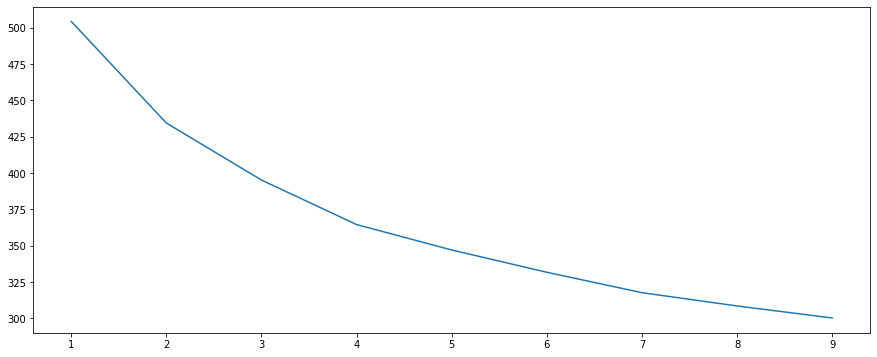

In [55]:
from sklearn.cluster import KMeans
wcv = []
for i in range(1,10):
    km = KMeans(n_clusters = i)
    km.fit(data)
    wcv.append(km.inertia_)
plt.figure(figsize = (15,6))
plt.plot(range(1,10),wcv)
plt.show()

###### Number of clusters in this dataset could be 2,3 or 4 looking at the above wcv graph

###### Agglomerative Clustering

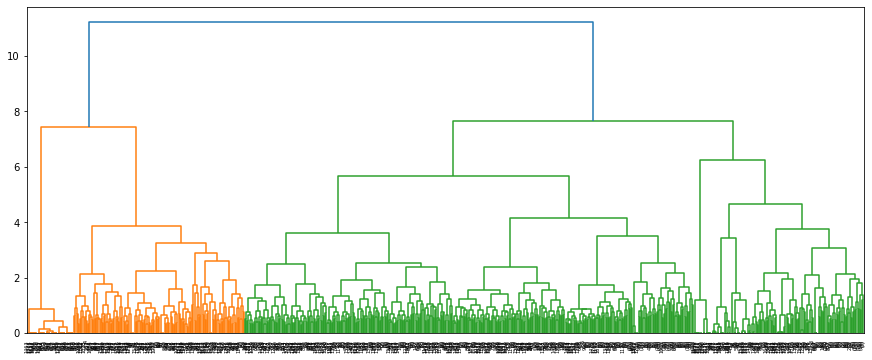

In [57]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (15,6))
sch.dendrogram(sch.linkage(data,'ward'),p = 10,truncate_mode = 'level')
plt.show()
#Clearly we can see 2 clusters being formed

###### Applying PCA and KMeans

In [58]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)
csum = np.cumsum(pca.explained_variance_ratio_)
np.where(csum>0.95)[0][1]

17

In [63]:
pca = PCA(n_components = 17)
X_pca = pd.DataFrame(pca.fit_transform(data))

###### Applying KMeans and Agglomerative clustering

In [80]:
km = KMeans(n_clusters=2)
km.fit(X_pca)
target_km = pd.Series(km.predict(X_pca))

In [81]:
target_km.value_counts()

0    1282
1     348
dtype: int64

In [97]:
from sklearn.cluster import AgglomerativeClustering
hca = AgglomerativeClustering(n_clusters = 2)
hca.fit(X_pca)
target_hca = pd.Series(hca.labels_,name = 'Sentiment')

In [98]:
X_pca.shape

(1630, 17)

In [99]:
#Pulling data from mongodb database
dat = pd.DataFrame([i for i in collection.find()])
dat.drop('_id',axis = 1,inplace = True)
dat_orig = dat.drop_duplicates()

In [180]:
data_w_target = pd.concat((dat[['Date','Article']],target_hca),axis = 1).dropna()

In [181]:
data_w_target['Sentiment'] = data_w_target['Sentiment'].map({0:'Positive',1:'Negative'})

### Examples of negative articles clustered

In [193]:
data_w_target[data_w_target['Sentiment']=='Negative'].iloc[0,1][:1000]

'While the Finance Ministry’s ‘request’ to Sebi to withdraw the new valuation rule for perpetual bonds surprised many, what intrigued industry watchers more was mutual fund body Amfi\'s U-turn to side with the markets regulator on an issue, which the industry had objected to when the rules were first notified on Wednesday, March 10.\n\nTwo days later on Friday, the industry body said it fully supports the capital markets regulator’s new rule, which puts a cap on mutual fund exposure to perpetual bonds. In a statement, the Association of Mutual Funds in India said: "it fully supports the need and spirit of the circular in capping exposure to perpetual bonds."\n\nIndustry watchers and investor protection groups agree that the Sebi circular was in the investor interest. It was, in a way, follow-up action to an earlier move in which the markets regulator had in October 2020 banned direct purchase of perpetual or AT1 bonds of banks by retail investors.\n\nThis action followed a fiasco invol

In [194]:
data_w_target[data_w_target['Sentiment']=='Negative'].iloc[1,1][:1000]

'MUMBAI: HDFC Mutual Fund on Tuesday sold 2.01% of its holding in SpiceJet in the open market, the airline said in a notification to the BSE on Friday. The aggregate holding of the schemes of HDFC MF in the company as of March 9 is3.03% of the paid-up equity share capital of the company, the notification said.\n\nHDFC Trustee Company held 5.05% in SpiceJet at the end of the December quarter.\n\nShares of SpiceJet were down 0.3% at Rs 82.75 in afternoon trade on Friday. The stock has gained 55% in the last six months.\n\n'

In [195]:
data_w_target[data_w_target['Sentiment']=='Negative'].iloc[2,1][:1000]

'Shares of the Berger Paints (India) Ltd. traded at Rs 720.4 on BSE at 02:07PM (IST) on Friday, down 1.26 per cent from previous close. \n\n The stock quoted a 52-week low price of Rs 390.0 and a high of Rs 824.8. \n\n Earlier, shares of the company saw a gap up opening in the morning. \n\n A total of 15,799 lakh shares changed hands on the counter till 02:07PM (IST). \n\n The stock of Berger Paints (India) Ltd. commands a market value of Rs 69938.1 crore. \n\n The stock traded at a price-to-earning (P/E) multiple of 113.74, while the price-to-book value ratio stood at 18.16. Return on equity (ROE) was at 24.72 per cent, according to exchange data. \n\n In the BSE500 pack, 217 stocks traded in the green, while 283 stocks were in the red. \n\n\n Promotor Holding\n Promoters held 60.5 per cent in the Berger Paints (India) Ltd. as of 31-Dec-2020 while foreign portfolio investors and domestic institutional investors owned 11.52 per cent and 0.91 per cent, respectively.\n'

In [196]:
data_w_target[data_w_target['Sentiment']=='Negative'].iloc[3,1][:1000]

"NEW DELHI: Shares of Biocon Ltd. traded 0.27 per cent down in Friday's trade at 01:51PM (IST). Around 189,211 shares changed hands on the counter. \n\n The stock opened at Rs 402.5 and touched an intraday high and low of Rs 404.6 and Rs 397.9, respectively, in the session so far. The stock of Biocon Ltd. quoted a 52-week high of Rs 487.7 and a 52-week low of Rs 235.8. \n\n As per BSE, the total market cap of the Biocon Ltd. stood at Rs 48078.0 crore at the time of writing this report. \n\n\n Key Financials\n The company reported consolidated sales of Rs 1878.9 crore for the quarter ended 31-Dec-2020, up 6.74 per cent from previous quarter's Rs 1760.3 crore and up 5.33 per cent from the year-ago quarter's Rs 1783.9 crore. \n\n The net profit for latest quarter stood at Rs 168.6 crore, down 16.86 per cent from the corresponding quarter last year. \n\n\n Shareholding pattern\n As of 31-Dec-2020, DIIs held 3.05 per cent stake in the firm, while foreign institutional investors held 17.65 p

### Examples of positive Articles clustered

In [197]:
data_w_target[data_w_target['Sentiment']=='Positive'].iloc[0,1][:1000]

"Bitcoin, the world's biggest cryptocurrency, on Saturday reached a record high, trading up to $60,000.\n\nBitcoin is up more than 2 per cent from its previous year high of $58,354.14 on Feb. 21.\n\nBitcoin's price soared this year as major firms, such as BNY Mellon, asset manager BlackRock Inc, credit card giant Mastercard Inc, backed cryptocurrencies, while those such as Tesla Inc, Square Inc and MicroStrategy Inc invested in bitcoin.\n"

In [198]:
data_w_target[data_w_target['Sentiment']=='Positive'].iloc[1,1][:1000]

"Eminent portfolio manager Paul Black says the best way investors can ensure consistent wealth creation is by betting on good growth companies with superior culture that have a strong competitive advantage over peers.\n\nBlack says in order to become a successful growth investor, one should be optimistic about the future because optimists can conquer great heights.\n\n“If you look back through history, optimists are the ones who ultimately get it right. Buffett says it all the time: never bet against America. I'd say never bet against great growth companies with superior cultures and the ones that are highly competitively advantaged,” Black said in an interview with CapitalAllocatorsPodcast.com.\n\nPaul Black is the co-CEO and fund manager at the California-based WCM Investment Management, which manages over $42 billion in investor money. He joined the firm in 1989 and attributes its investing success to a lot of hard work and also good fortune.\n\n\nHow Black got interested in stocks\

In [199]:
data_w_target[data_w_target['Sentiment']=='Positive'].iloc[2,1][:1000]

'In a truncated week, Indian equities failed to take any directional cues and the indices went all over the place in the four trading sessions, before ending the week with a modest gain.\n\nThe start of the week was volatile with Nifty trading in a wide range. However, the first part of the week saw a wider trading range of over 634 points, while the previous four session saw Nifty oscillate in a relatively narrower 416-point range.\n\nBroadly speaking, Nifty continued to face resistance at the lower top formed on the daily charts, which has the 15,250-15,300 zone offering stiff resistance. Following a sharp correction seen on the last trading day of the week, the headline index ended with a net gain of 92.85 points, or 0.62 per cent.\n\nDespite improving market breadth, Nifty confirmed its slippage into a broad-range consolidation. On the higher side, the 15,250-15,300 zone continued to act as stiff resistance. Unless this zone is taken out, Nifty will struggle to see any meaningful u

In [200]:
data_w_target[data_w_target['Sentiment']=='Positive'].iloc[4,1][:1000]

'There are green shoots visible in various sectors of the economy and the country is already looking at a \'V-shaped\' recovery, Minister of State for Finance and Corporate Affairs Anurag Thakur said on Saturday. "India is already looking at \'V-shaped\' recovery. Along with the green shoots in various sectors, in the month of February, FPI inflows were Rs 25,787 crore," Thakur said at a virtual conclave organised by the Institute of Actuaries of India. \n\n After two consecutive quarters of contraction, the country\'s gross domestic product (GDP) entered into a positive territory with a growth of 0.4 per cent in the October-December quarter of the current fiscal, according to the data released by the National Statistical Office (NSO) in February. \n\n Thakur said the country\' foreign exchange reserves, which have been steadily increasing over the last few months, had touched all time high at USD 590 billion in January 2021. \n\n He said the accretion to the forex reserves in the last

# Overall proportion of postive vs negative news in the dataset

c:\users\tejas\anaconda3\envs\stocks\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


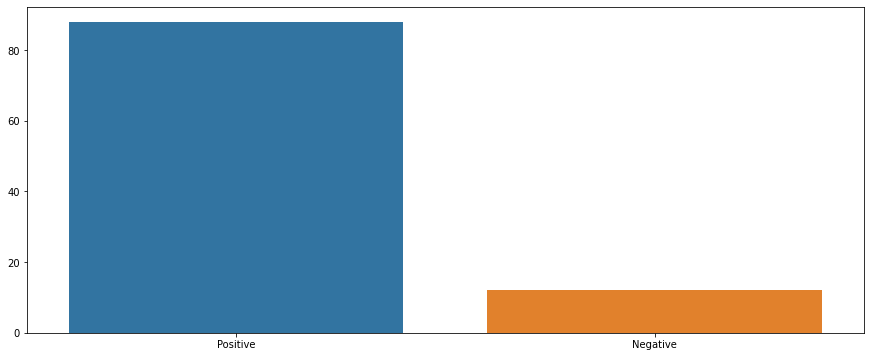

In [190]:
import seaborn as sns
temp = data_w_target['Sentiment'].value_counts()/len(data_w_target)*100
plt.figure(figsize = (15,6))
sns.barplot(temp.index,temp.values)
plt.show()

In [191]:
#Articles present in this dataset are from Feb 12th 2021 to Mar 13th 2021.
raw_data_original.tail(1)

,Date,Headlines,Summary,Article
1631,"Feb 12, 2021",Has hotel business become an albatross around ...,Shareholders of the company delivered their ve...,NEW DELHI: Dalal Street remained divided on IT...


In [149]:
raw_data_original.head(1)

,Date,Headlines,Summary,Article
0,"March 13,2021","Bitcoin hits $60,000 in record high",Bitcoin is up more than 2 per cent from its pr...,"Bitcoin, the world's biggest cryptocurrency, o..."


###### Most of the news in this month has been positive according to our clusters. Let us check the price of Nifty in the begining of Feb vs Begining of March

In [155]:
#What was the price trend from Feb12 to Mar12?

In [177]:
nifty_price = pd.read_csv('Data/NSE Prices Jan-13 to Mar 19th - Sheet1.csv').iloc[21:,:]
nifty_price['Date'] = nifty_price['Date'].apply(lambda x: x.split()[0])

c:\users\tejas\anaconda3\envs\stocks\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


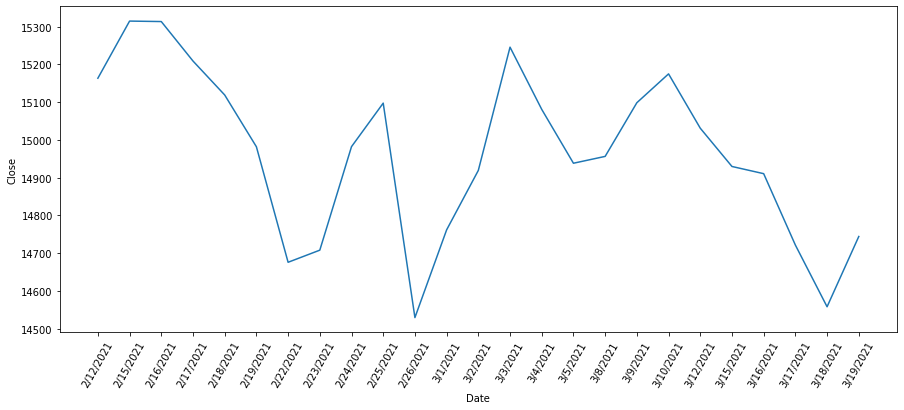

In [178]:
plt.figure(figsize = (15,6))
sns.lineplot(nifty_price['Date'],nifty_price['Close'])
plt.xticks(rotation = 60)
plt.show()

Post the pandemic the stock market has been extremely volatile and hence has made investors more nervous to invest in the market. Though I would still say that the sentiments of people cannot be entirely judged based on news articles, a pattern may be found between previous days news and next days trading behaviour. Since the stock market is the people's market, nobody can predict the price with 100% ceertainty. The outcomes of this project can be taken into account as one of the factors for investors to decide on whether to invest in the market or not.